In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

## Principal Components Analysis

In [20]:
SP500_DATA_CSV = '../data/sp500_data.csv.gz'

- 셰브런(Chevron, CVX)와 엑슨모빌(Exxon Mobil, XOM)의 주가 수익 데이터

In [21]:
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head())

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168
1993-02-03  0.067964  0.058337
1993-02-04  0.034378  0.044272


In [22]:
oil_x = [i for i in range(len(oil_px.index))]

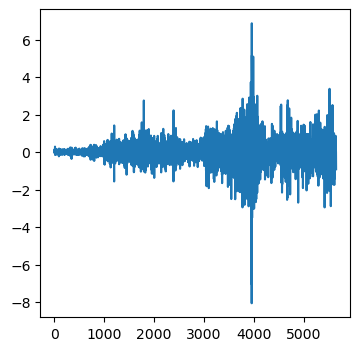

In [23]:
plt.figure('original', figsize=(4, 4))
plt.plot(oil_x, oil_px['XOM'])
plt.show()

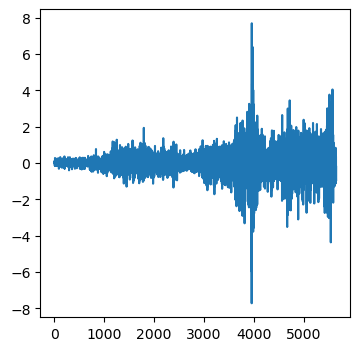

In [24]:
plt.figure('original', figsize=(4, 4))
plt.plot(oil_x, oil_px['CVX'])
plt.show()

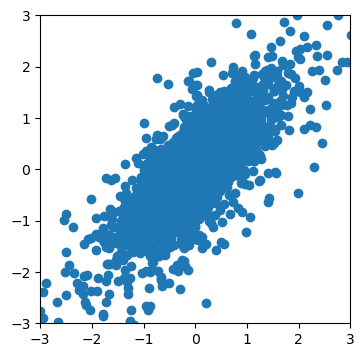

In [25]:
plt.figure('original', figsize=(4, 4))
plt.scatter(oil_px['XOM'], oil_px['CVX'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [26]:
pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
print(loadings)

        XOM       CVX
0 -0.664711 -0.747101
1  0.747101 -0.664711


첫번째 주성분 - 두 석유 회사 사이의 상관관계를 반영하는 CVX & XOM의 평균 (양의 상관관계?)

두번째 주성분 - 두 회사의 주가가 달라지는 지점을 반영 (음의 상관관계?)

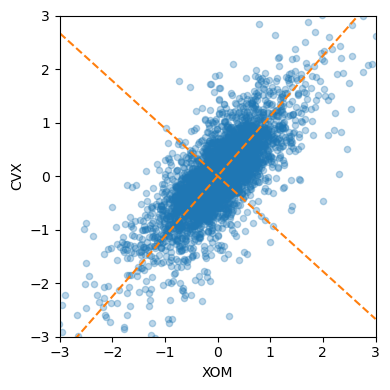

In [27]:
def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax), '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax), '--', color='C1')

plt.tight_layout()
plt.show()

- 스크리 그래프 (screeplot)

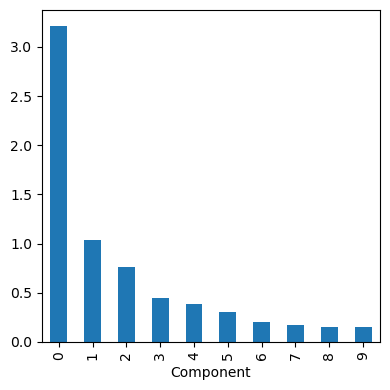

In [28]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
               'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

In [29]:
print(type(top_sp))
print(type(top_sp[['AAPL']]))
print(type(top_sp['AAPL']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
print(top_sp[['AAPL']])
print(top_sp[['AAPL']].shape)
print(top_sp[['AAPL']].index)

                AAPL
2011-01-03  0.527368
2011-01-04 -0.154321
2011-01-05  0.597152
2011-01-06 -0.132850
2011-01-07  0.285820
...              ...
2015-06-25 -1.360001
2015-06-26 -0.919998
2015-06-29 -0.930000
2015-06-30 -0.140000
2015-07-01 -0.300004

[1131 rows x 1 columns]
(1131, 1)
Index(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
       '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14',
       ...
       '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23', '2015-06-24',
       '2015-06-25', '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01'],
      dtype='object', length=1131)


In [31]:
print(top_sp['AAPL'])
print(top_sp['AAPL'].shape)
print(top_sp['AAPL'].index)

2011-01-03    0.527368
2011-01-04   -0.154321
2011-01-05    0.597152
2011-01-06   -0.132850
2011-01-07    0.285820
                ...   
2015-06-25   -1.360001
2015-06-26   -0.919998
2015-06-29   -0.930000
2015-06-30   -0.140000
2015-07-01   -0.300004
Name: AAPL, Length: 1131, dtype: float64
(1131,)
Index(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
       '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14',
       ...
       '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23', '2015-06-24',
       '2015-06-25', '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01'],
      dtype='object', length=1131)


In [32]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
print(loadings.head())

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

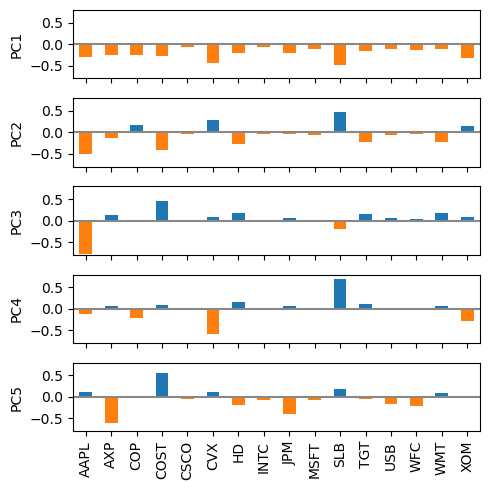

In [33]:
maxPC = 1.01 * loadings.loc[0:5, :].abs().to_numpy().max()

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()